# STOCK PRICE PREDICTOR
---

#### Importing the necessary libraries

In [2]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


#### Reading the dataset
Selecting "GOOG" as the stock name and taking the values for the past decade

In [4]:
stock="GOOG"
end=datetime.now()
start=datetime(year=end.year-10,month=end.month,day=end.day)
google_data=yf.download(stock,start,end)

[*********************100%%**********************]  1 of 1 completed


In [5]:
google_data.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-07-28,29.322994,29.543886,29.157598,29.449146,29.415672,19736037
2014-07-29,29.356901,29.404270,29.095867,29.200331,29.167139,26997920
2014-07-30,29.247202,29.394299,29.120050,29.290583,29.257290,20329662
2014-07-31,28.950516,29.102598,28.421967,28.501747,28.469351,42055146
2014-08-01,28.441914,28.719152,28.065447,28.226006,28.193922,39105069


In [6]:
google_data.tail(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-07-19,180.369995,181.970001,178.860001,179.389999,179.389999,14485900
2024-07-22,182.350006,184.300003,181.899994,183.350006,183.350006,16303900
2024-07-23,183.839996,185.220001,183.330002,183.600006,183.600006,23772600
2024-07-24,175.389999,177.949997,173.570007,174.369995,174.369995,31250700
2024-07-25,174.250000,175.199997,169.050003,169.160004,169.160004,28927100


#### Exploring insights about the dataset

In [7]:
google_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03
mean,76.475121,77.292495,75.726702,76.528141,76.443797,3.150121e+07
std,41.597188,42.074616,41.183536,41.632551,41.591989,1.540523e+07
min,24.664783,24.730902,24.311253,24.560070,24.532154,6.936000e+06
25%,40.353000,40.531001,40.128624,40.344500,40.298640,2.187155e+07
50%,60.035500,60.560999,59.642500,60.235500,60.167032,2.772400e+07
75%,112.271124,113.837660,110.954750,112.421751,112.293966,3.630050e+07
max,191.750000,193.309998,190.619995,192.660004,192.660004,2.232980e+08


In [8]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2014-07-28 to 2024-07-25
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2516 non-null   float64
 1   High       2516 non-null   float64
 2   Low        2516 non-null   float64
 3   Close      2516 non-null   float64
 4   Adj Close  2516 non-null   float64
 5   Volume     2516 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 137.6 KB


The dataset would only contain float and int values. Moreover the dataset does not contain any null values

In [9]:
google_data.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999821,0.999805,0.999575,0.999575,-0.331854
High,0.999821,1.000000,0.999778,0.999801,0.999801,-0.328455
Low,0.999805,0.999778,1.000000,0.999823,0.999824,-0.337719
Close,0.999575,0.999801,0.999823,1.000000,1.000000,-0.334060
Adj Close,0.999575,0.999801,0.999824,1.000000,1.000000,-0.334064
Volume,-0.331854,-0.328455,-0.337719,-0.334060,-0.334064,1.000000


<Axes: >

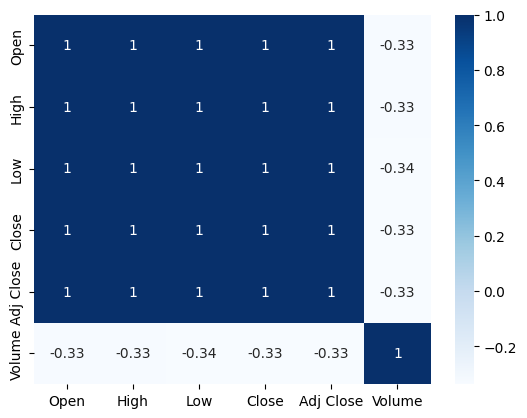

In [10]:
corr_data=google_data.corr()
sns.heatmap(corr_data,annot=True,cmap="Blues")

* From the above correlation table, we can clearly observe that there is a high correlation between the features: "Open","High","Low","Close" and "Adj Close" as expected.
* The features "volume" has a negative correlation with other features. This indicates that higher trading volumes are associated with lower prices, which might indicate higher activity during price drops and vice versa.

Text(0, 0.5, 'Adj. Close')

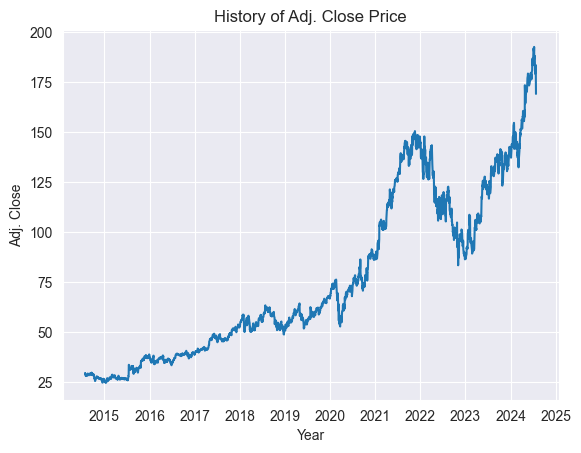

In [11]:
sns.set_style('darkgrid')
plt.plot(google_data["Adj Close"])
plt.title("History of Adj. Close Price")
plt.xlabel("Year")
plt.ylabel("Adj. Close")

Text(0, 0.5, 'Volume')

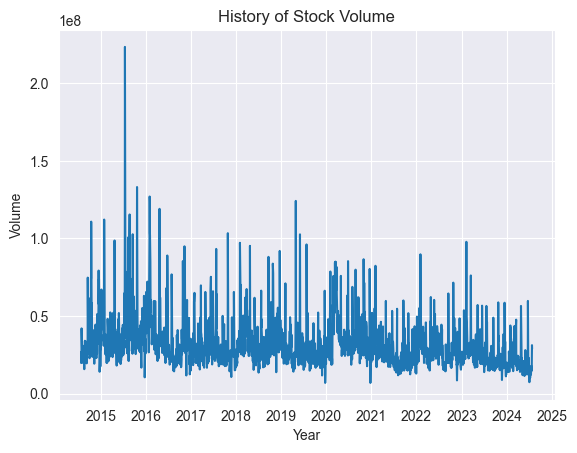

In [12]:
sns.set_style('darkgrid')
plt.plot(google_data["Volume"])
plt.title("History of Stock Volume")
plt.xlabel("Year")
plt.ylabel("Volume")


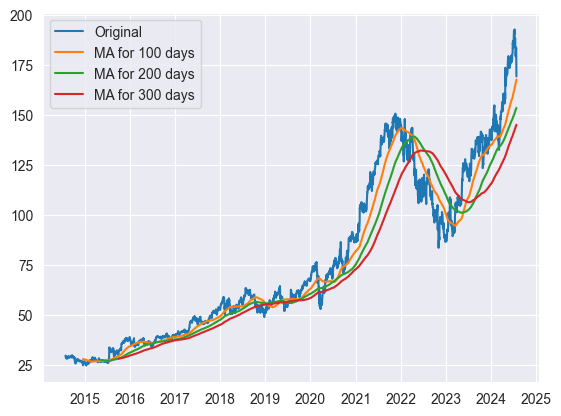

In [13]:
def plot_ma(data,ma):
    plt.plot(data)
    for m in ma:
        plt.plot(data.rolling(m).mean())
    plt.legend(["Original","MA for 100 days","MA for 200 days","MA for 300 days"])
ma=[100,200,300]
plot_ma(google_data["Adj Close"],ma)

The rolling average calculations are used to smoothen short-term fluctuations and highlight long-term trends in data.

-------

As explained in the correlation section, since the features other than "Volume" are highly correlated therefore, we can make use of any of these features for making predictions.

Moreover, as seen in the description of the dataset; the max and min values of the "Adj Close" column are 192.660004 and 24.532154 respectively. We need to scale the values.

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(google_data[["Adj Close"]])
scaled_data

array([[0.02904646],
       [0.02756822],
       [0.02810442],
       ...,
       [0.94611245],
       [0.89121369],
       [0.86022542]])

In [16]:
len(scaled_data)

2516

Now, basically we would be storing the "Adj Close" price for first 100 days as the X_data and the value of the "Adj Close" price for the 101th day would be the y_data

#### PREPARING THE TRAINING AND TESTING DATASET

In [17]:
X_data=[]
y_data=[]
for i in range(100,len(scaled_data)):
    X_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])

In [18]:
splitting_length=int(len(X_data)*0.7)
X_train=X_data[:splitting_length]
y_train=y_data[:splitting_length]
X_test=X_data[splitting_length:]
y_test=y_data[splitting_length:]

print(f"Length of X_train : {len(X_train)}")
print(f"Length of y_train : {len(y_train)}")
print(f"Length of X_test : {len(X_test)}")
print(f"Length of y_test : {len(y_test)}")
X_train,y_train=np.array(X_train),np.array(y_train)
X_test,y_test=np.array(X_test),np.array(y_test)

Length of X_train : 1691
Length of y_train : 1691
Length of X_test : 725
Length of y_test : 725


---

#### CREATING THE MODEL

In [20]:
pip install numpy==1.26.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 5.4 MB/s eta 0:00:0000:0100:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.4.2 which is incompatible.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.7.6 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from keras.models import Sequential
from keras.layers import Dense,LSTM

In [ ]:
model=Sequential()
model.add(LSTM(128,input_shape=(X_train.shape[1],1),return_sequences=True))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(20))
model.add(Dense(1))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer="adam",loss="mean_squared_error")

In [ ]:
model.fit(X_train,y_train,batch_size=64,epochs=10)

Epoch 1/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 121ms/step - loss: 1.3526e-04
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 123ms/step - loss: 1.4624e-04
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 123ms/step - loss: 1.3967e-04
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 119ms/step - loss: 1.2328e-04
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 126ms/step - loss: 1.3816e-04
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step - loss: 1.3022e-04
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 121ms/step - loss: 1.2668e-04
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 124ms/step - loss: 1.2155e-04
Epoch 9/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step - loss: 1.3044e-04
Epoch 10/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - loss: 1.1936e-04


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 20)             │         1,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 351,869 (1.34 MB)

 Trainable params: 117,289 (458.16 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 234,580 (916.33 KB)

### MAKING THE PREDICTIONS
----

We also need to revert back the scaled values to their original form for both the predictions obtained and the y_test array

In [ ]:
predictions=model.predict(X_test)
actual_predictions=scaler.inverse_transform(predictions)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


In [ ]:
inv_y_test=scaler.inverse_transform(y_test)


Utilising the r2_score metric to understand the performance of the model

In [ ]:
from sklearn.metrics import r2_score
r2_value=r2_score(y_test,y_pred=predictions)
print(r2_value)

0.9634460253351383


In [ ]:
plotting_data=pd.DataFrame({
    "Original Prices":inv_y_test.reshape(-1),
    "Predictions":actual_predictions.reshape(-1)
},index=google_data.index[splitting_length+100:])

#### PLOTTING THE PREDICTIONS V TESTING DATA

In [ ]:
plotting_data

,Original Prices,Predictions
Date,,
2021-09-03,144.610428,146.002747
2021-09-07,145.353592,146.539795
2021-09-08,144.718811,147.032928
2021-09-09,144.748779,147.443268
2021-09-10,141.759689,147.780884
...,...,...
2024-07-18,179.220001,193.183090
2024-07-19,179.389999,192.668152
2024-07-22,183.350006,191.954269


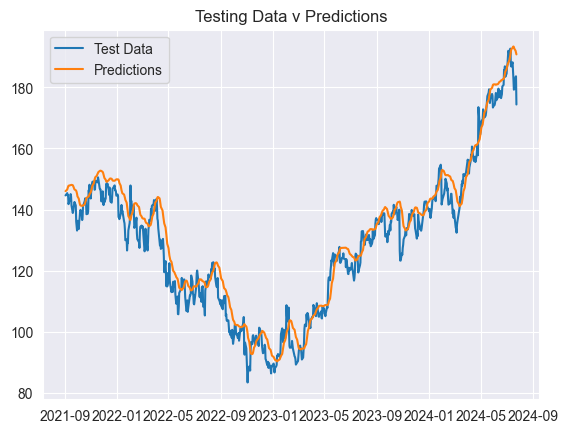

In [ ]:
plt.plot(plotting_data)
plt.title("Testing Data v Predictions")
plt.legend(["Test Data","Predictions"])


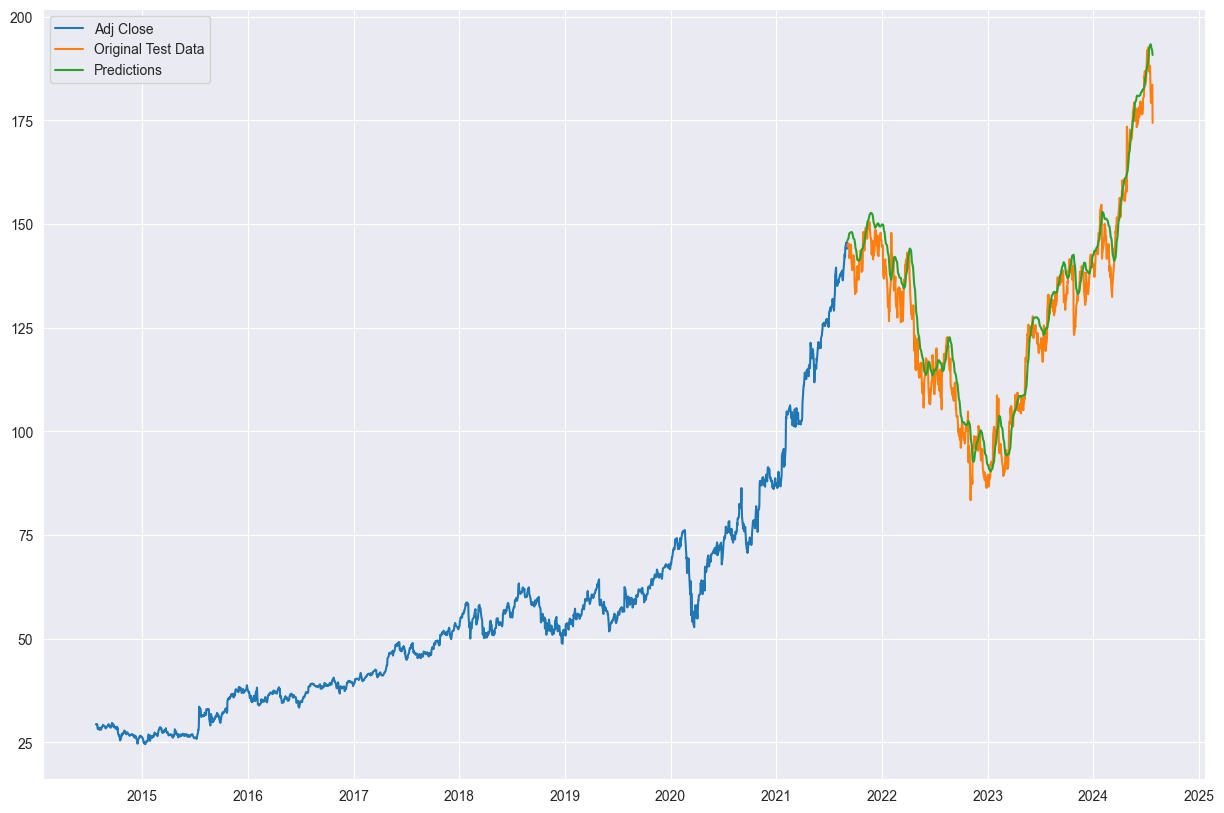

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(pd.concat([google_data["Adj Close"][:splitting_length+100],plotting_data],axis=0))
plt.legend(["Adj Close","Original Test Data","Predictions"])

In [ ]:
model.save("stock_model_1.h5")

NameError: name 'model' is not defined